In [303]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [304]:
import numpy as np
import pandas as pd

In [305]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [306]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [307]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [308]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [309]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [310]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [311]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [312]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [313]:
# Display the Measurement class
session.query(Measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1bf91a4ee88>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397'}

In [314]:
# Display the Station class
session.query(Station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1bf93c15d88>,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [315]:
# Getting the earliest and latest dates to understand the length of the data
earliest_date = session.query(Measurement.date).\
                order_by(Measurement.date).first()
latest_date = session.query(Measurement.date).\
                order_by(Measurement.date.desc()).first()
print(f'Earliest Date: {earliest_date}')
print(f'Latest Date: {latest_date}')

Earliest Date: ('2010-01-01',)
Latest Date: ('2017-08-23',)


In [342]:
# Querying the date and prcp columns into 1 variable
date_prcp_last_12 = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= '2016-08-23').\
                    order_by(Measurement.date).all()
date_prcp_last_12

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [343]:
# Filtering out the null (None) values
date_last_12 = []
prcp_last_12 = []

for data in date_prcp_last_12:
    if type(data.prcp) == float:
        date_last_12.append(data.date)
        prcp_last_12.append(data.prcp)

In [344]:
date_last_12

['2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-23',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-24',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-25',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-26',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-27',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-28',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-29',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-30',
 '2016-08-31',
 '2016-08-31',
 '2016-08-31',
 '2016-08-31',
 '2016-08-31',
 '2016-09-01',
 '2016-09-01',
 '2016-09-01',
 '2016-09-01',
 '2016-09-01',
 '2016-09-02',
 '2016-09-02',
 '2016-09-02',
 '2016-09-02',
 '2016-09-02',
 '2016-09-03',
 '2016-09-03',
 '2016-09-03',
 '2016-09-

In [345]:
# Create a dictionary to later use to make a DataFrame
list_data = {'Date':date_last_12, 'Precipitation':prcp_last_12}
list_data

{'Date': ['2016-08-23',
  '2016-08-23',
  '2016-08-23',
  '2016-08-23',
  '2016-08-23',
  '2016-08-23',
  '2016-08-24',
  '2016-08-24',
  '2016-08-24',
  '2016-08-24',
  '2016-08-24',
  '2016-08-24',
  '2016-08-25',
  '2016-08-25',
  '2016-08-25',
  '2016-08-25',
  '2016-08-25',
  '2016-08-25',
  '2016-08-25',
  '2016-08-26',
  '2016-08-26',
  '2016-08-26',
  '2016-08-26',
  '2016-08-26',
  '2016-08-26',
  '2016-08-27',
  '2016-08-27',
  '2016-08-27',
  '2016-08-27',
  '2016-08-27',
  '2016-08-28',
  '2016-08-28',
  '2016-08-28',
  '2016-08-28',
  '2016-08-28',
  '2016-08-28',
  '2016-08-29',
  '2016-08-29',
  '2016-08-29',
  '2016-08-29',
  '2016-08-29',
  '2016-08-29',
  '2016-08-30',
  '2016-08-30',
  '2016-08-30',
  '2016-08-30',
  '2016-08-30',
  '2016-08-30',
  '2016-08-31',
  '2016-08-31',
  '2016-08-31',
  '2016-08-31',
  '2016-08-31',
  '2016-09-01',
  '2016-09-01',
  '2016-09-01',
  '2016-09-01',
  '2016-09-01',
  '2016-09-02',
  '2016-09-02',
  '2016-09-02',
  '2016-09-02',


In [346]:
# Creating a DataFrame with the date and precipitation data
df = pd.DataFrame(data=list_data)
df.set_index('Date', inplace=True)
sorted_df = df.sort_values('Date')
sorted_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.08


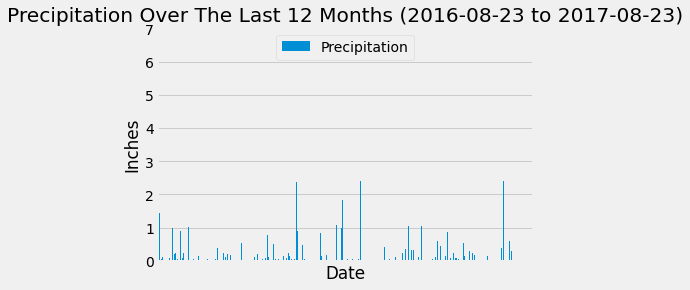

In [352]:
# Creating a histogram to display the inches of run over the last 12 months
sorted_df.plot.bar(title="Precipitation Over The Last 12 Months (2016-08-23 to 2017-08-23)", label="Date", rot=90)

plt.ylabel("Inches")

plt.xticks([])

plt.grid
plt.show()

In [38]:

#plt.xlabel("Date")
#plt.ylabel("Inches")

#plt.legend(loc='upper right')

#x = numpy.arange(0, 1, 0.05)
#y = numpy.power(x, 2)

#fig = plt.figure()
#ax = fig.gca()
#ax.set_xticks(numpy.arange(0, 1, 0.1))
#ax.set_yticks(numpy.arange(0, 1., 0.1))
#plt.scatter(x, y)

In [302]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [179]:
# Design a query to show how many stations are available in this dataset?
unique_stations = session.query(Station.name, func.count(Station.name)).\
                    group_by(Station.name)
unique_stations.all()

[('HONOLULU OBSERVATORY 702.2, HI US', 1),
 ('KANEOHE 838.1, HI US', 1),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 1),
 ('MANOA LYON ARBO 785.2, HI US', 1),
 ('PEARL CITY, HI US', 1),
 ('UPPER WAHIAWA 874.3, HI US', 1),
 ('WAIHEE 837.5, HI US', 1),
 ('WAIKIKI 717.2, HI US', 1),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 1)]

In [182]:
station_list = []
for data in unique_stations:
    station_list.append(data[0])

In [183]:
station_list

['HONOLULU OBSERVATORY 702.2, HI US',
 'KANEOHE 838.1, HI US',
 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'MANOA LYON ARBO 785.2, HI US',
 'PEARL CITY, HI US',
 'UPPER WAHIAWA 874.3, HI US',
 'WAIHEE 837.5, HI US',
 'WAIKIKI 717.2, HI US',
 'WAIMANALO EXPERIMENTAL FARM, HI US']

In [178]:
print(f"There are {unique_stations.count()} stations available.")

There are 9 stations available.


In [61]:
session.query(Measurement.station, Station.station).limit(10).all()

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397')]

In [158]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
pre_join = [func.count(Measurement.tobs), Station.name]
same_station = session.query(*pre_join).\
                filter(Measurement.station == Station.station).\
                group_by(Station.name).\
                order_by(func.count(Measurement.tobs).desc()).all()
same_station

[(2772, 'WAIHEE 837.5, HI US'),
 (2724, 'WAIKIKI 717.2, HI US'),
 (2709, 'KANEOHE 838.1, HI US'),
 (2669, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 (2612, 'MANOA LYON ARBO 785.2, HI US'),
 (2202, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 (1979, 'HONOLULU OBSERVATORY 702.2, HI US'),
 (1372, 'PEARL CITY, HI US'),
 (511, 'UPPER WAHIAWA 874.3, HI US')]

In [92]:
print(f'The most active station is {same_station[0][1]} at {same_station[0][0]} visits.')

The most active station is WAIHEE 837.5, HI US at 2772 visits.


In [196]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# Lowest Temperature
low_pre_join = [func.min(Measurement.tobs), Station.name]
low_same_station = session.query(*low_pre_join).\
                filter(Measurement.station == Station.station).all()
print(f'The lowest temperature recorded is {low_same_station[0][0]} degrees at {low_same_station[0][1]}.')

The lowest temperature recorded is 53.0 degrees at HONOLULU OBSERVATORY 702.2, HI US.


In [197]:
# Highest Temperature
high_pre_join = [func.max(Measurement.tobs), Station.name]
high_same_station = session.query(*high_pre_join).\
                filter(Measurement.station == Station.station).all()
print(f'The highest temperature recorded is {high_same_station[0][0]} degrees at {high_same_station[0][1]}.')

The highest temperature recorded is 87.0 degrees at WAIKIKI 717.2, HI US.


In [198]:
# Average Temperature
avg_pre_join = [func.avg(Measurement.tobs), Station.name]
avg_same_station = session.query(*avg_pre_join).\
                filter(Measurement.station == Station.station).\
                group_by(Station.name).\
                order_by(func.avg(Measurement.tobs).desc()).all()
print(f'The average temperature recorded for the most active station is {round(avg_same_station[0][0],2)} degrees at {avg_same_station[0][1]}.')

The average temperature recorded for the most active station is 74.87 degrees at KUALOA RANCH HEADQUARTERS 886.9, HI US.


In [226]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# WAIHEE 837.5, HI US
pre_join = [Measurement.date, Measurement.tobs]

# Query to get the length of the date data (Earliest)
same_station = session.query(*pre_join).\
                filter(Measurement.station == Station.station).\
                filter(Station.name == 'WAIHEE 837.5, HI US').\
                order_by(Measurement.date).first()
same_station

('2010-01-01', 70.0)

In [227]:
# Query to get the length of the date data (Latest)
same_station = session.query(*pre_join).\
                filter(Measurement.station == Station.station).\
                filter(Station.name == 'WAIHEE 837.5, HI US').\
                order_by(Measurement.date.desc()).first()
same_station

('2017-08-18', 79.0)

In [276]:
# Querying the last 12 months of 2017-08-18
same_station = session.query(*pre_join).\
                filter(Measurement.station == Station.station).\
                filter(Station.name == 'WAIHEE 837.5, HI US').\
                filter(Measurement.date >= '2016-08-18').all()
same_station

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [229]:
# Collect the data into a list to call it easier
date_list = []
tobs_list = []
for data in same_station:
    date_list.append(data[0])
    tobs_list.append(data[1])
    
#date_list
tobs_list

[80.0,
 79.0,
 81.0,
 79.0,
 78.0,
 77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,

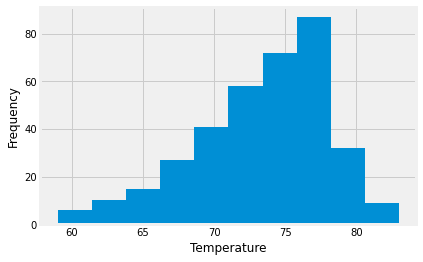

In [188]:
# Plot histogram to show results of temperature frenquency in WAIHEE 837.5, HI US
plt.hist(tobs_list)

plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.grid
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
